Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [473]:
NAME = "Farnaz Ghodousipour"

## Assignment 1 - Data Preparation for Modelling
**(30 points total)**

For this assignment, we will use an open dataset with data on various types of cereal and the corresponding customer ratings. Use the .csv file provided.

Create a dataframe by importing the file into Jupyter, and complete the following tasks:

**Question 1.**  _(10 points)_
* Review the data. Consider how this data set could be better organized/prepared to support your analysis (e.g., groupings by type of cereal, adding new variables, etc.). Transform your dataset as you see fit and explain your approach.

**Question 2.**  _(10 points)_
* Based on your transformed dataset, conduct exploratory analysis to understand the data and identify potential relationships between variables that are worth exploring. Develop and state your hypothesis about the drivers or predictors of customer ratings. 

**Question 3.** _(5 points)_
* QUALITATIVE ANSWER ONLY: Which Python functions did you use to transform your dataset? Did you need to define any of your own functions? Why?

**Question 4.**  _(5 points)_
* QUALITATIVE ANSWER ONLY: What type of model could you use to predict customer ratings based on cereal attributes? How would you need to adjust your dataset in order to build this model?

In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks') 

import warnings
warnings.filterwarnings('ignore')

In [475]:
df=pd.read_csv(r'cereal.csv',header=0)

In [476]:
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [477]:
cal=df['calories']/df['cups'].round()


In [478]:
pro=df['protein']/df['cups'].round()


In [479]:
fat1=df['fat']/df['cups'].round()


In [480]:
sod=df['sodium']/df['cups'].round()


In [481]:
fib=df['fiber']/df['cups'].round()


In [482]:
carb=df['carbo']/df['cups'].round()


In [484]:
potas=df['potass']/df['cups'].round()


In [485]:
vit=df['vitamins']/df['cups'].round()


In [486]:
w=df['weight']/df['cups'].round()


In [487]:
df['cups']=1

In [488]:
df.replace({'calories':'cal', 'protein':'pro', 'fat':'fat1','sodium':'sod','fiber':'fib','carbo':'carb','sugars':'sug','potass':'potas','vitamins':'vit','weight':'w'''},inplace=True)

In [501]:
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,1,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,1,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,1,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,1,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,1,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,1,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,1,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,1,53.313813


to be able to compare different kinds of cereals we need to have a unique measurement in this case I set cups to one for all of them.

In [490]:
df.sort_values('rating', ascending=False)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,1,93.704912
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,1,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,1,72.801787
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,1,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1,68.235885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.00,1,22.736446
18,Count Chocula,G,C,110,1,1,180,0.0,12.0,13,65,25,2,1.00,1,22.396513
35,Honey Graham Ohs,Q,C,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1,21.871292
12,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.00,1,19.823573


In [491]:
df['calories'].unique()

array([ 70, 120,  50, 110, 130,  90, 100, 140, 150, 160,  80], dtype=int64)

In [492]:
df_cal=df1.groupby('calories')

In [493]:
df_cal.get_group(110).head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
6,Apple Jacks,K,C,110.0,2.0,0.0,125.0,1.0,11.0,14.0,30.0,25.0,2,1.0,1,33.174094
14,Cocoa Puffs,G,C,110.0,1.0,1.0,180.0,0.0,12.0,13.0,55.0,25.0,2,1.0,1,22.736446
15,Corn Chex,R,C,110.0,2.0,0.0,280.0,0.0,22.0,3.0,25.0,25.0,1,1.0,1,41.445019
17,Corn Pops,K,C,110.0,1.0,0.0,90.0,1.0,13.0,12.0,20.0,25.0,2,1.0,1,35.782791
18,Count Chocula,G,C,110.0,1.0,1.0,180.0,0.0,12.0,13.0,65.0,25.0,2,1.0,1,22.396513
21,Crispix,K,C,110.0,2.0,0.0,220.0,1.0,21.0,3.0,30.0,25.0,3,1.0,1,46.895644
24,Froot Loops,K,C,110.0,2.0,1.0,125.0,1.0,11.0,13.0,30.0,25.0,2,1.0,1,32.207582
38,Just Right Crunchy Nuggets,K,C,110.0,2.0,1.0,170.0,1.0,17.0,6.0,60.0,100.0,3,1.0,1,36.523683
42,Lucky Charms,G,C,110.0,2.0,1.0,180.0,0.0,12.0,12.0,55.0,25.0,2,1.0,1,26.734515
62,Rice Krispies,K,C,110.0,2.0,0.0,290.0,0.0,22.0,3.0,35.0,25.0,1,1.0,1,40.560159


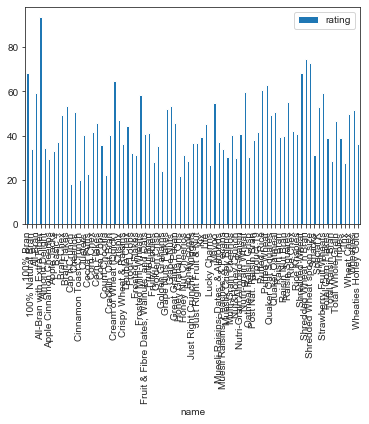

In [494]:
df.plot('name', 'rating', kind='bar')

In [495]:
df.groupby('type')['rating'].sum()

type
C    3115.046159
H     170.213125
Name: rating, dtype: float64

In [496]:
df.groupby('calories')['rating'].sum()


calories
50      217.466669
70      127.828478
80       68.235885
90      424.048774
100     806.449318
110    1037.904433
120     328.489726
130      67.489405
140     105.756617
150      71.276628
160      30.313351
Name: rating, dtype: float64

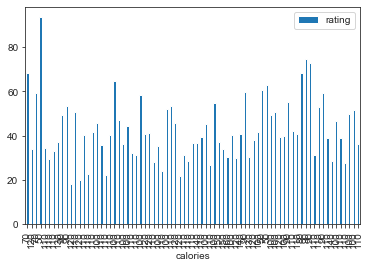

In [497]:
df.plot('calories', 'rating', kind='bar')

In [498]:
data=df.groupby(['calories'])['rating'].mean()


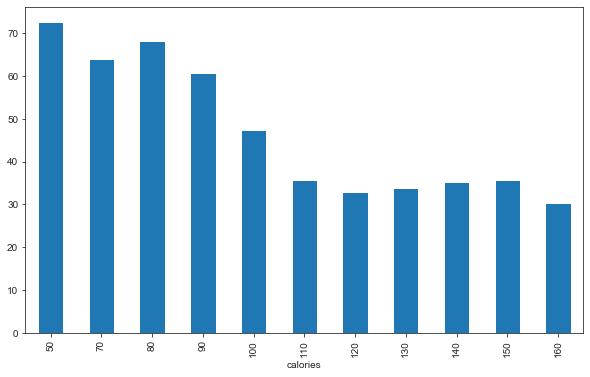

In [499]:
data.plot(kind='bar',figsize=(10,6))